### Necessary import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

#set visualization parameters
plt.rc(
    "figure",
    figsize=(12,5),
    autolayout = True
)

plt.rc(
    "axes",
    labelsize = 16,
    labelweight = 'bold',
    titlesize = 18,
    titleweight = 'bold',
    titlepad = 10
)

plot_params = dict(
        color = '0.75',
        markeredgecolor = '0.25',
        markerfacecolor = '0.25',
        style = '.-',
        legend = True
)

%config InlineBackend.figure_format = 'retina'

### Load the data

In [2]:
#read the data
tesla_df = pd.read_csv('data/TSLA.csv')
#view the data
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla_df['Date'].dtype

dtype('O')

In [4]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

In [5]:
tesla_df['Date'].dtype

dtype('<M8[ns]')

In [6]:
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
tesla_df.set_index('Date', inplace=True)

tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


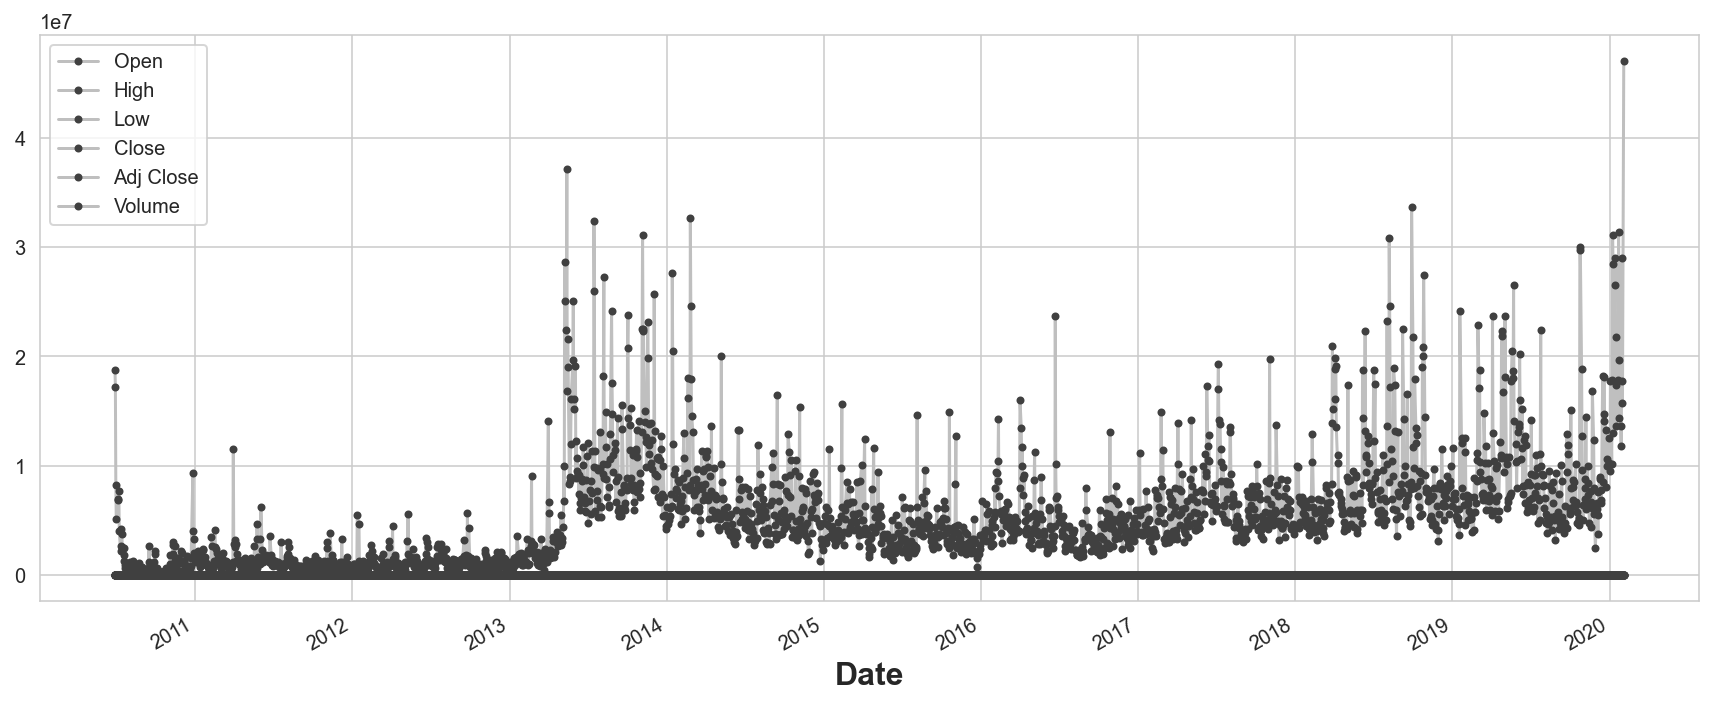

In [8]:
tesla_df.plot(**plot_params)
plt.show()

<AxesSubplot:xlabel='Date'>

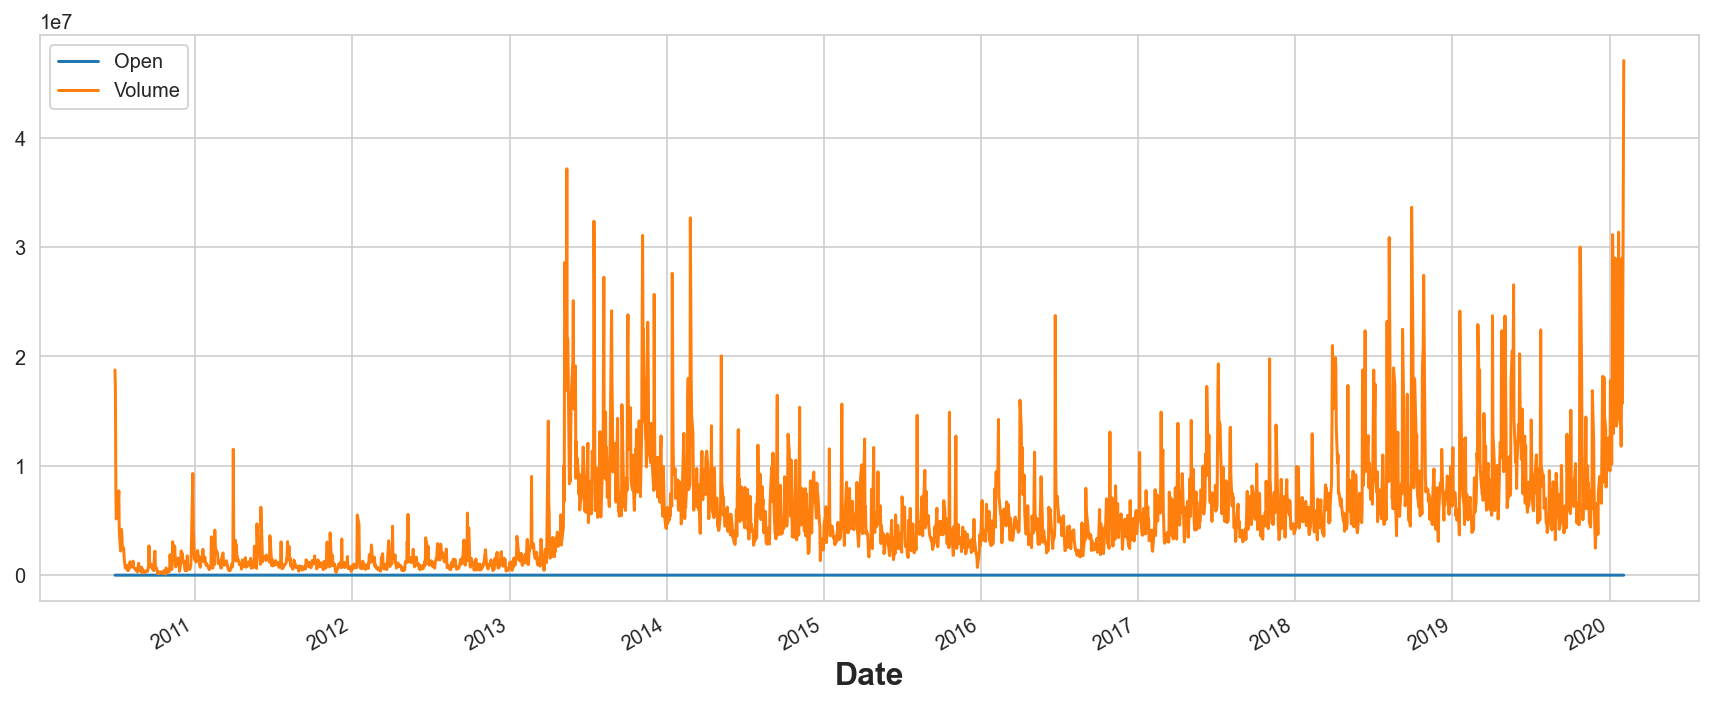

In [9]:
tesla_df[['Open', 'Volume']].plot()

<AxesSubplot:xlabel='Date'>

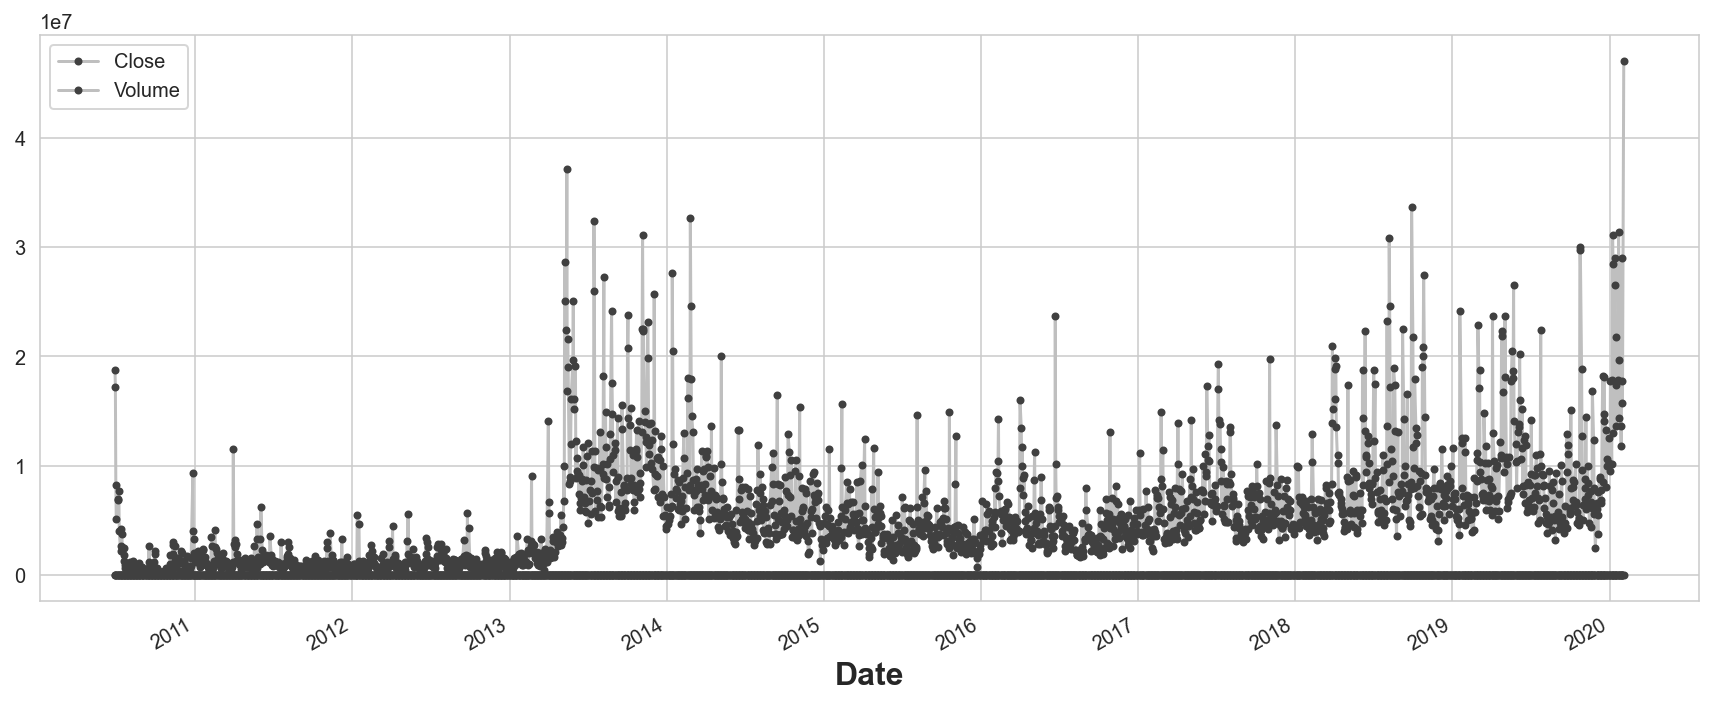

In [10]:
tesla_df[['Close', 'Volume']].plot(**plot_params)

<AxesSubplot:xlabel='Date'>

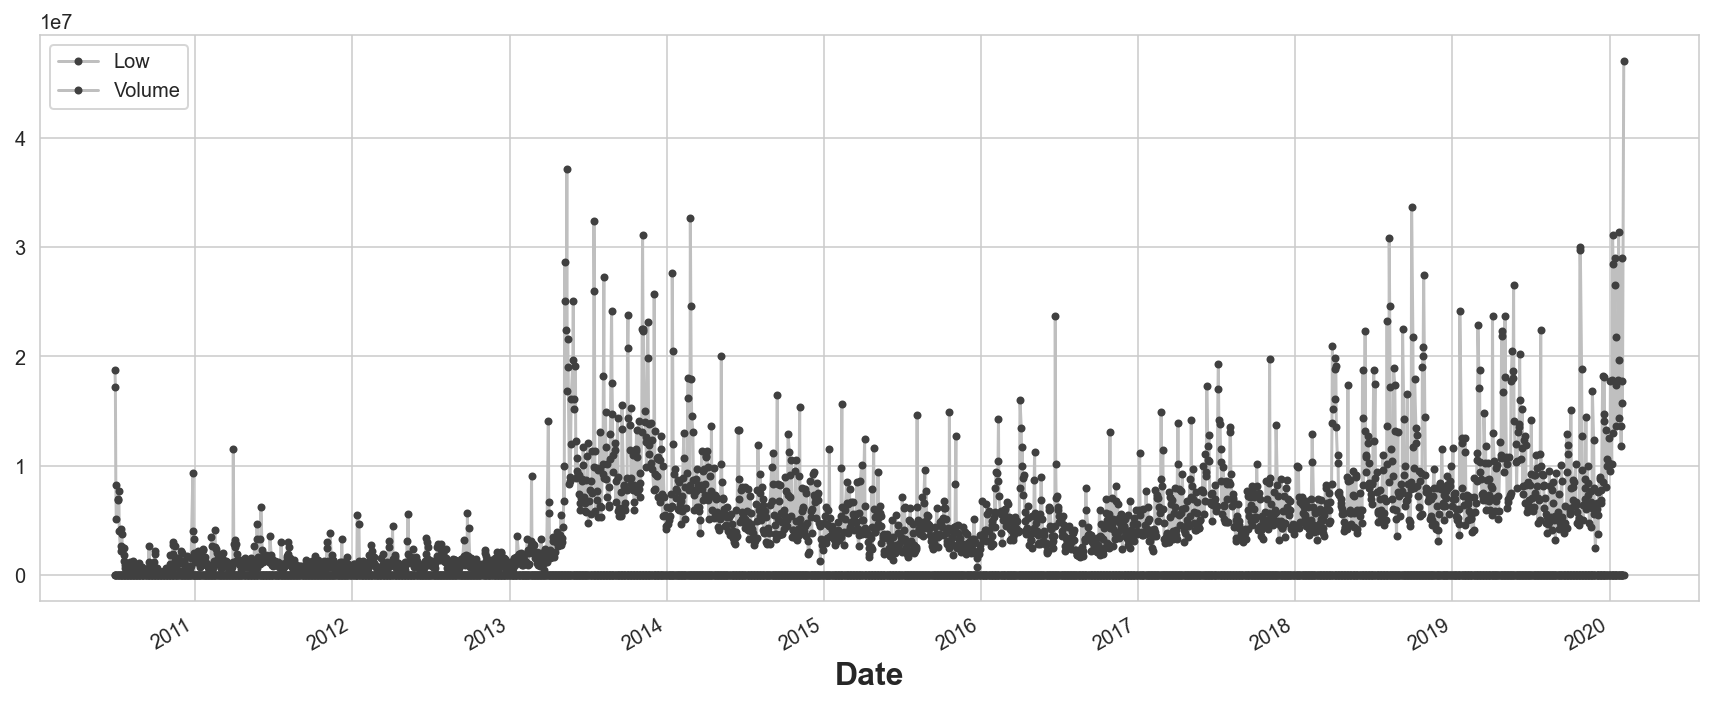

In [11]:
tesla_df[['Low', 'Volume']].plot(**plot_params)

<AxesSubplot:xlabel='Date'>

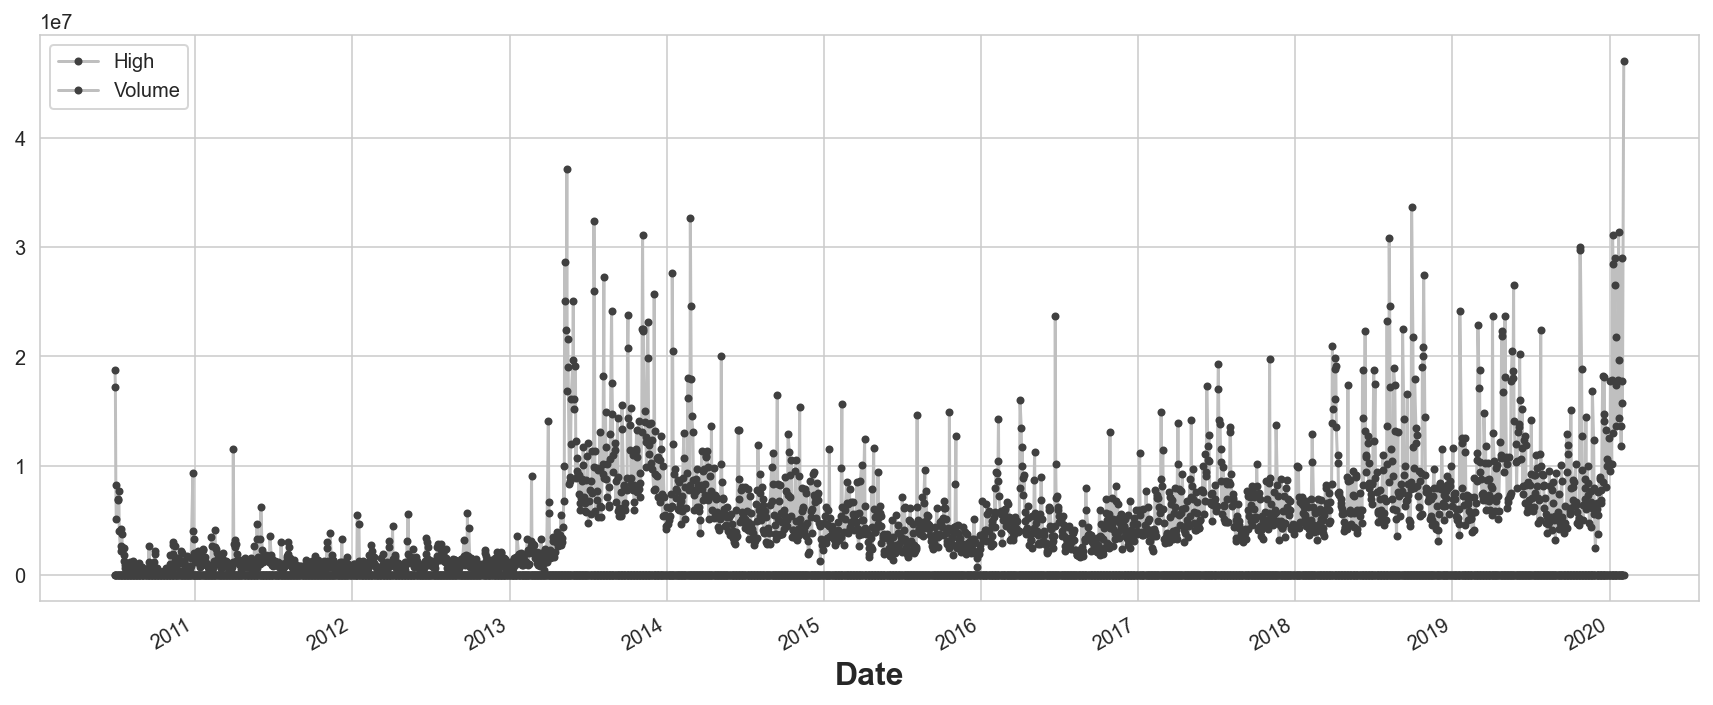

In [12]:
tesla_df[['High', 'Volume']].plot(**plot_params)

<AxesSubplot:xlabel='Date', ylabel='Open'>

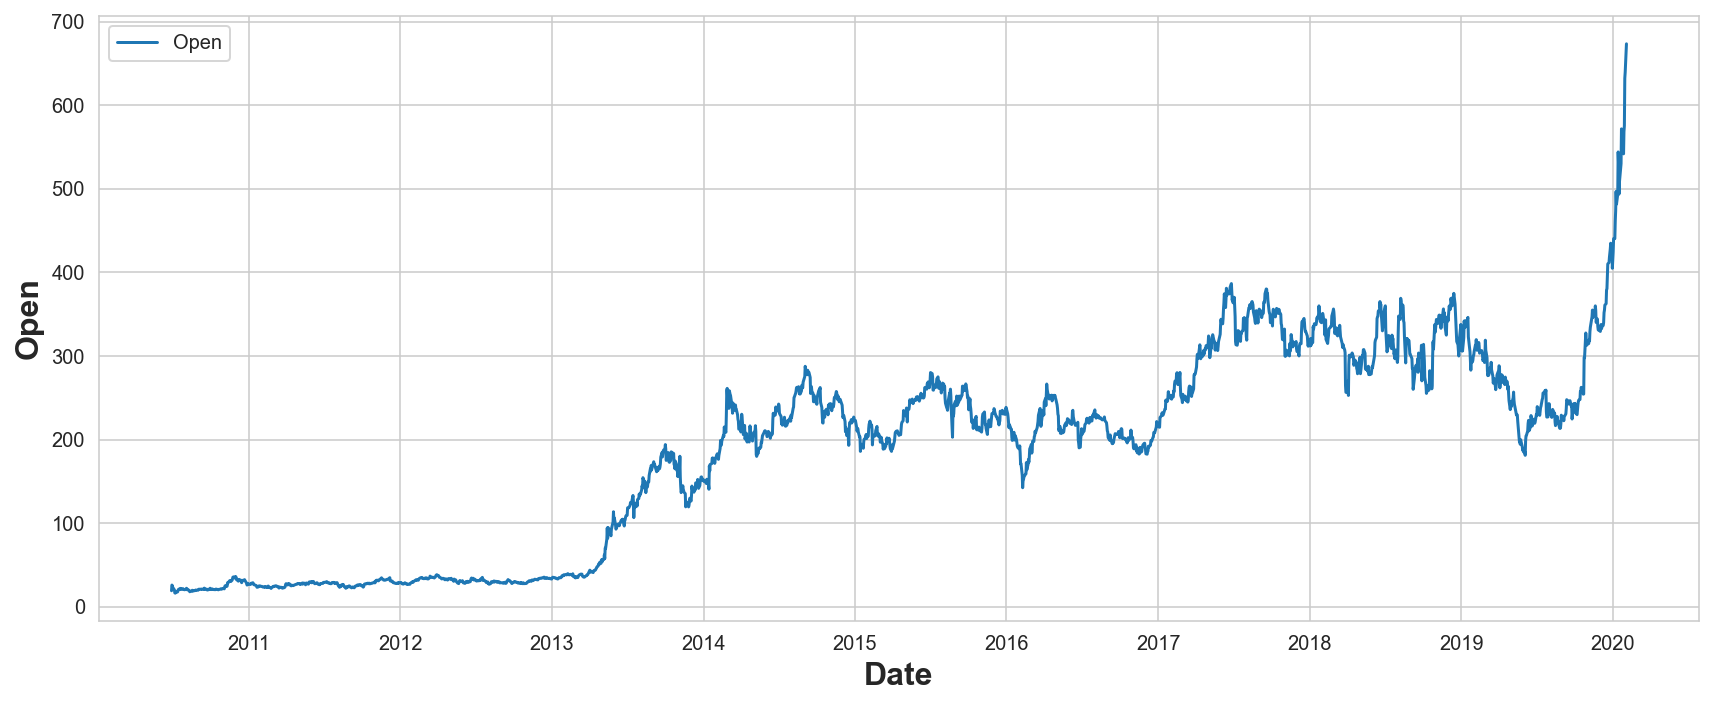

In [13]:
sns.lineplot(data = tesla_df['Open'], label = 'Open')

<AxesSubplot:xlabel='Date', ylabel='Close'>

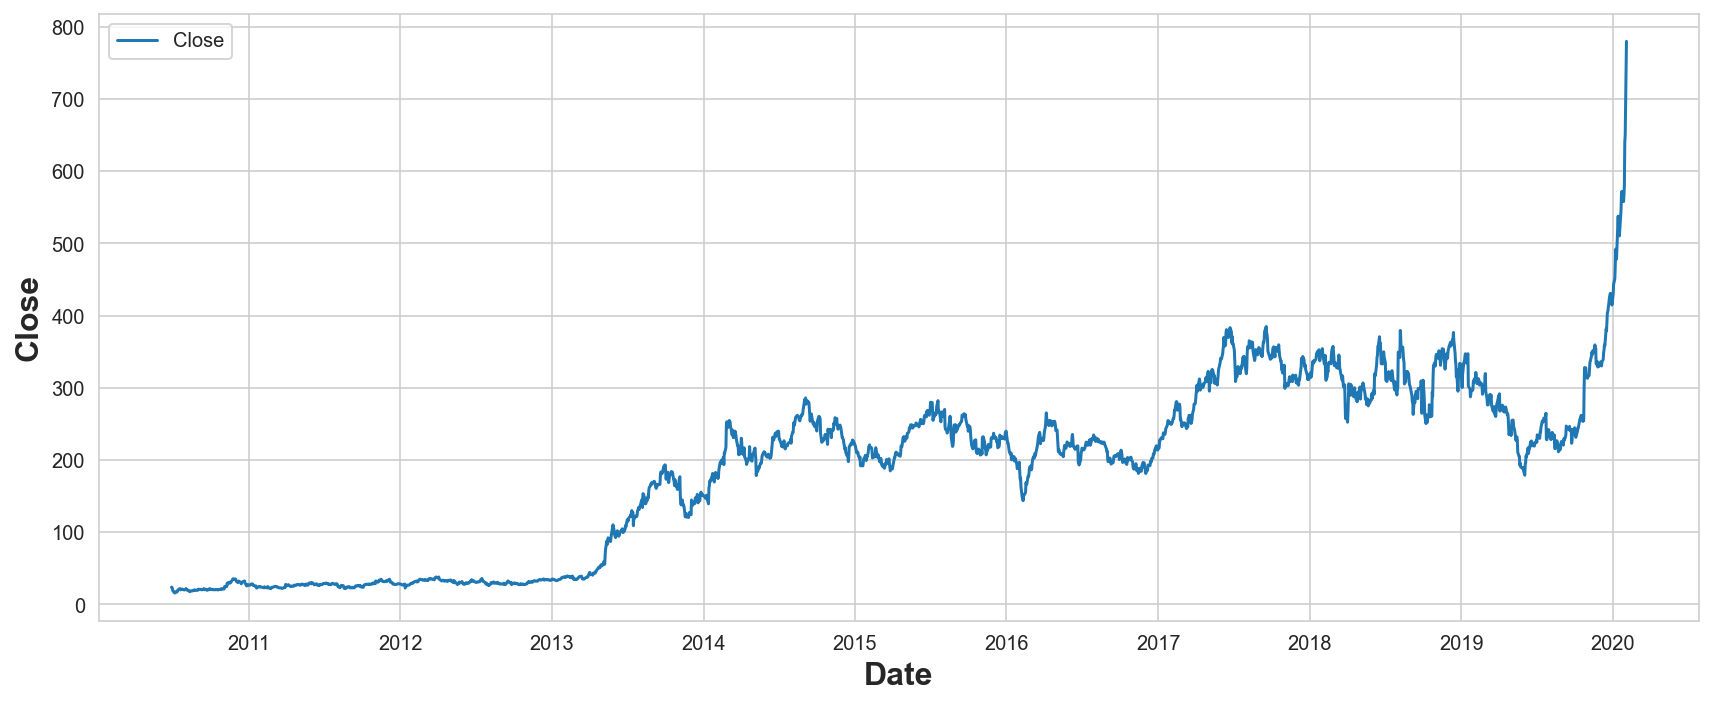

In [14]:
sns.lineplot(data = tesla_df['Close'], label = 'Close')

In [15]:
tesla_df['6-MA'] = tesla_df['Close'].rolling(window=6,center=True).mean()
tesla_df['12-MA'] = tesla_df['Close'].rolling(window=12, center=True).mean()
tesla_df['2-MA'] = tesla_df['Close'].rolling(window=2, center = True).mean()

In [16]:
tesla_df

,Open,High,Low,Close,Adj Close,Volume,6-MA,12-MA,2-MA
Date,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN,NaN,23.860000
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN,NaN,22.894999
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,20.131667,NaN,20.580000
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,19.060000,NaN,17.655001
...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,580.623342,NaN,562.460022
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,593.685008,NaN,573.945007
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,629.548340,NaN,610.899994


<AxesSubplot:xlabel='Date'>

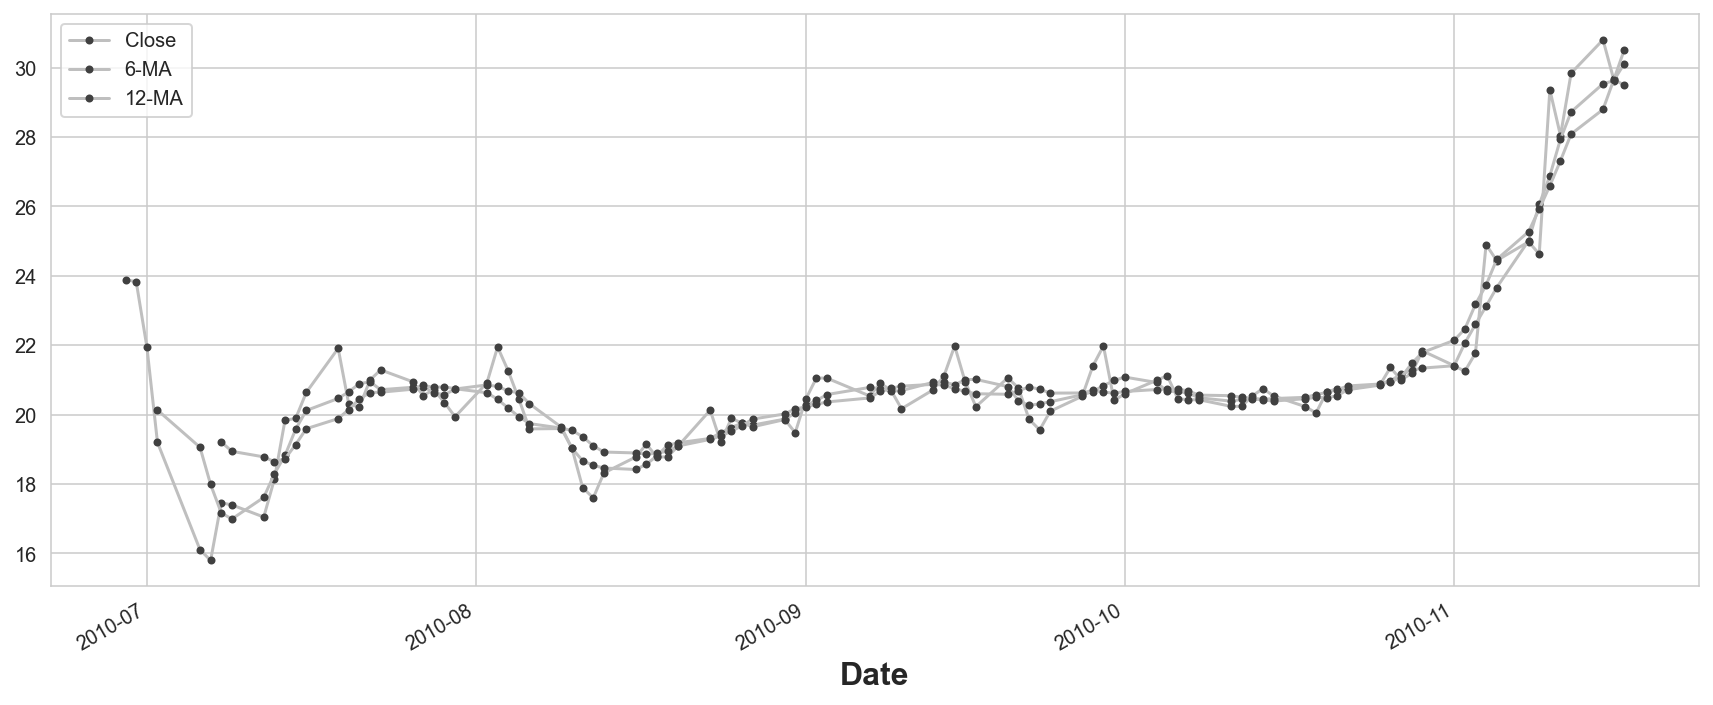

In [17]:
tesla_df[['Close', '6-MA', '12-MA']][:100].plot(**plot_params)

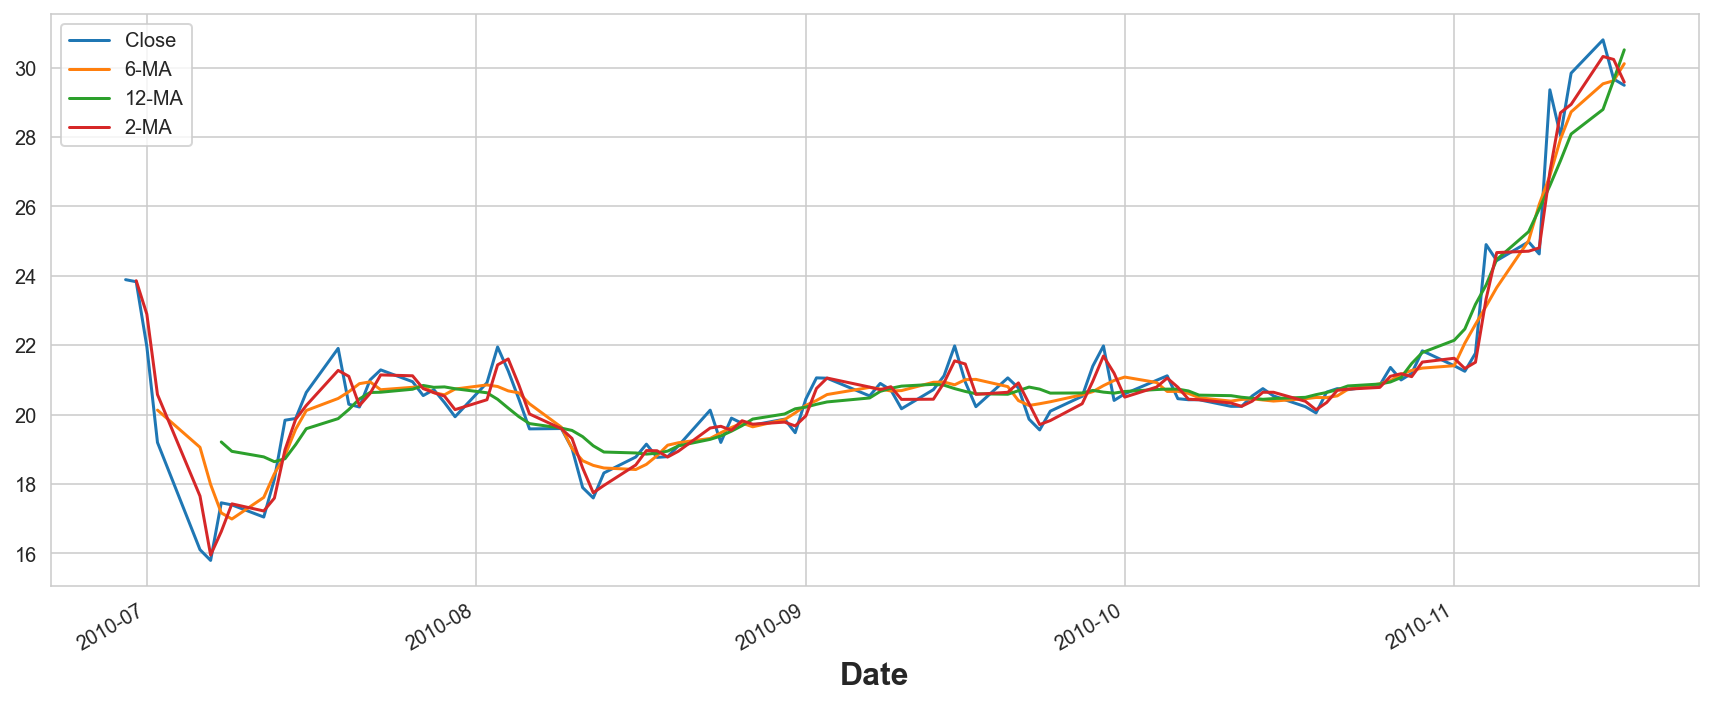

In [18]:
tesla_df[['Close', '6-MA', '12-MA', '2-MA']].iloc[:100].plot()
plt.show()

In [19]:
tesla_df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume,6-MA,12-MA,2-MA
Date,,,,,,,,,
2010-06-30,22.395001,27.710000,20.420000,23.860000,23.860000,1.797670e+07,NaN,NaN,23.860000
2010-07-31,20.073334,20.640000,18.816190,19.558095,19.558095,3.075038e+06,19.650250,19.925343,19.650714
2010-08-31,19.545455,19.910000,19.080455,19.510909,19.510909,6.835545e+05,19.522500,19.551743,19.521364
2010-09-30,20.779048,21.276190,20.309048,20.740476,20.740476,8.593286e+05,20.673175,20.637381,20.718333
2010-10-31,20.723333,20.992857,20.425714,20.713333,20.713333,3.118000e+05,20.709921,20.759960,20.679286
...,...,...,...,...,...,...,...,...,...
2019-10-31,263.945218,270.003476,260.628263,266.354784,266.354784,9.912287e+06,264.688189,264.588443,264.745001
2019-11-30,338.807001,342.578999,333.889499,338.300000,338.300000,7.888540e+06,338.062750,337.987084,337.924500
2019-12-31,374.696189,381.737620,371.012380,377.694763,377.694763,9.860952e+06,375.822859,376.930915,375.590240


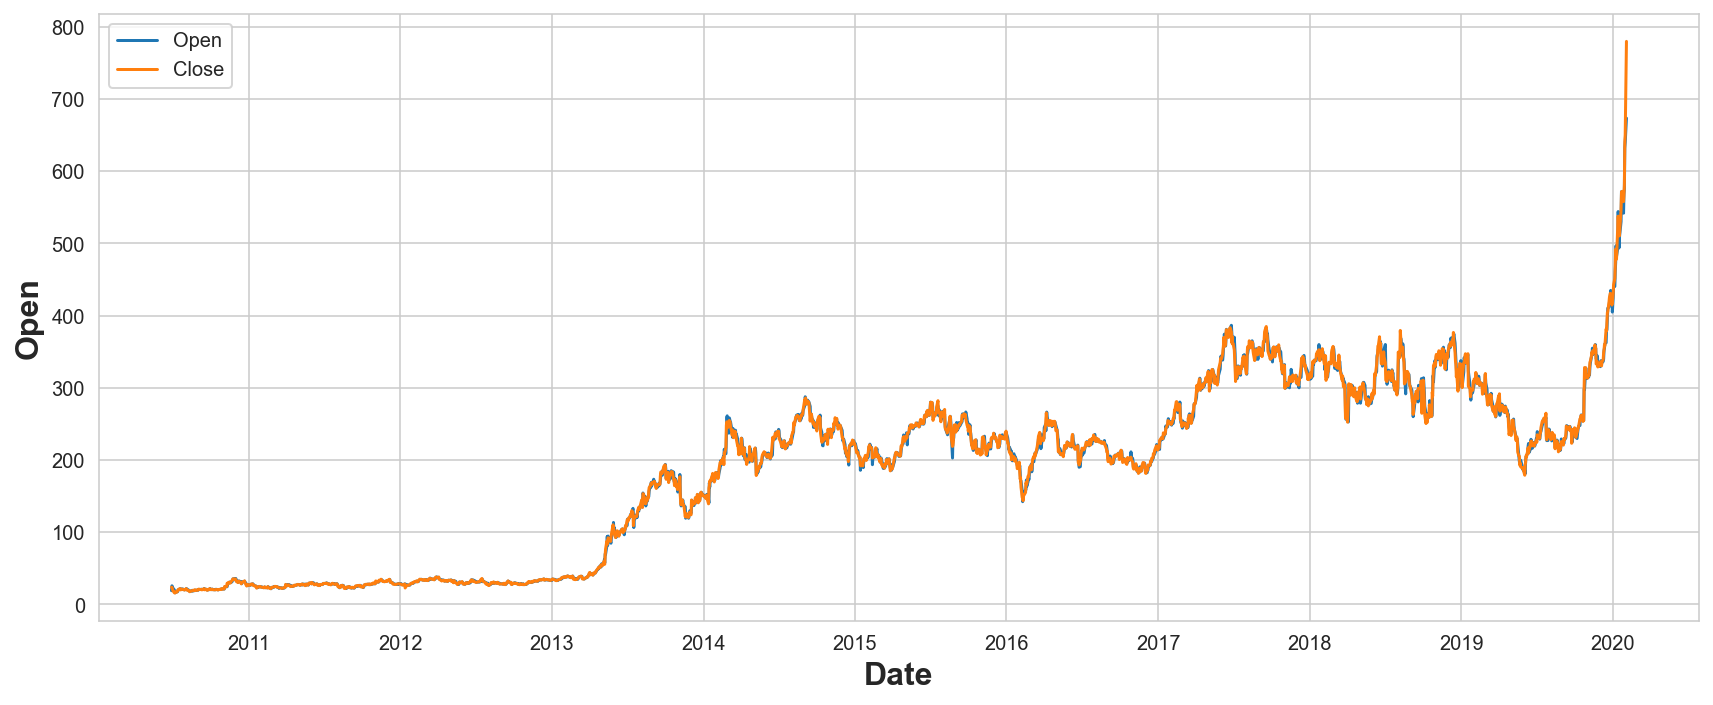

In [20]:
plt.figure(figsize=(12,5))

sns.lineplot(data = tesla_df['Open'], label = 'Open')
sns.lineplot(data = tesla_df['Close'], label = 'Close')
plt.show()

In [21]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume,6-MA,12-MA,2-MA
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2411.000000,2405.000000,2415.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,186.065158,185.781246,186.314400
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,117.876953,116.853039,118.778401
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,16.993333,18.645000,15.955001
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,34.260000,34.213334,34.390000
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06,213.621666,214.244166,213.190003
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,268.307500,267.543336,267.010010
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,629.548340,587.921672,715.285004


In [22]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
fig = px.box(tesla_df['Close'])
fig.show()

In [24]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
tesla_df = tesla_df.resample('M').mean()

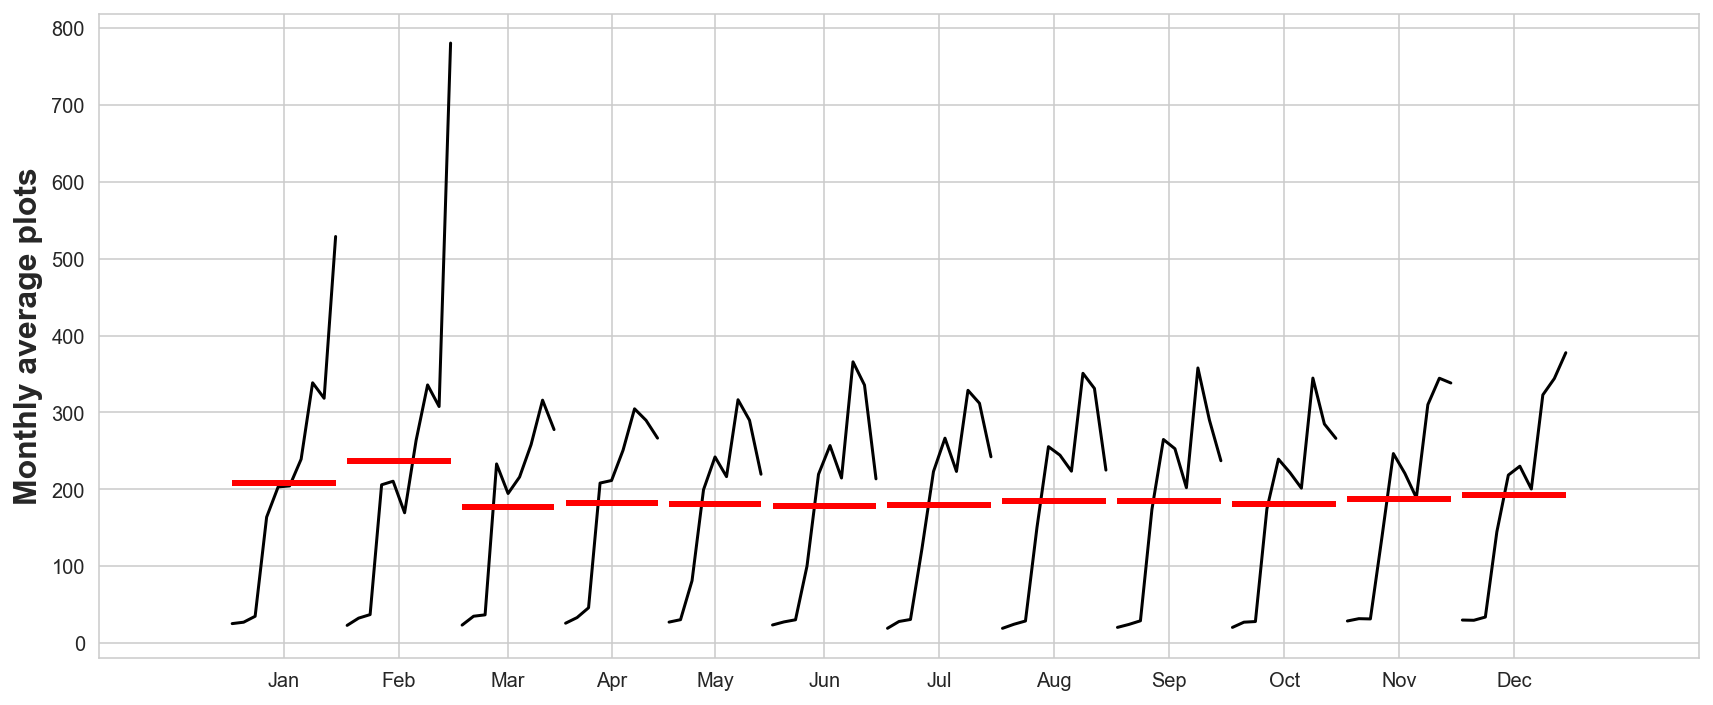

In [26]:
result = month_plot(tesla_df['Close'], ylabel= 'Monthly average plots')

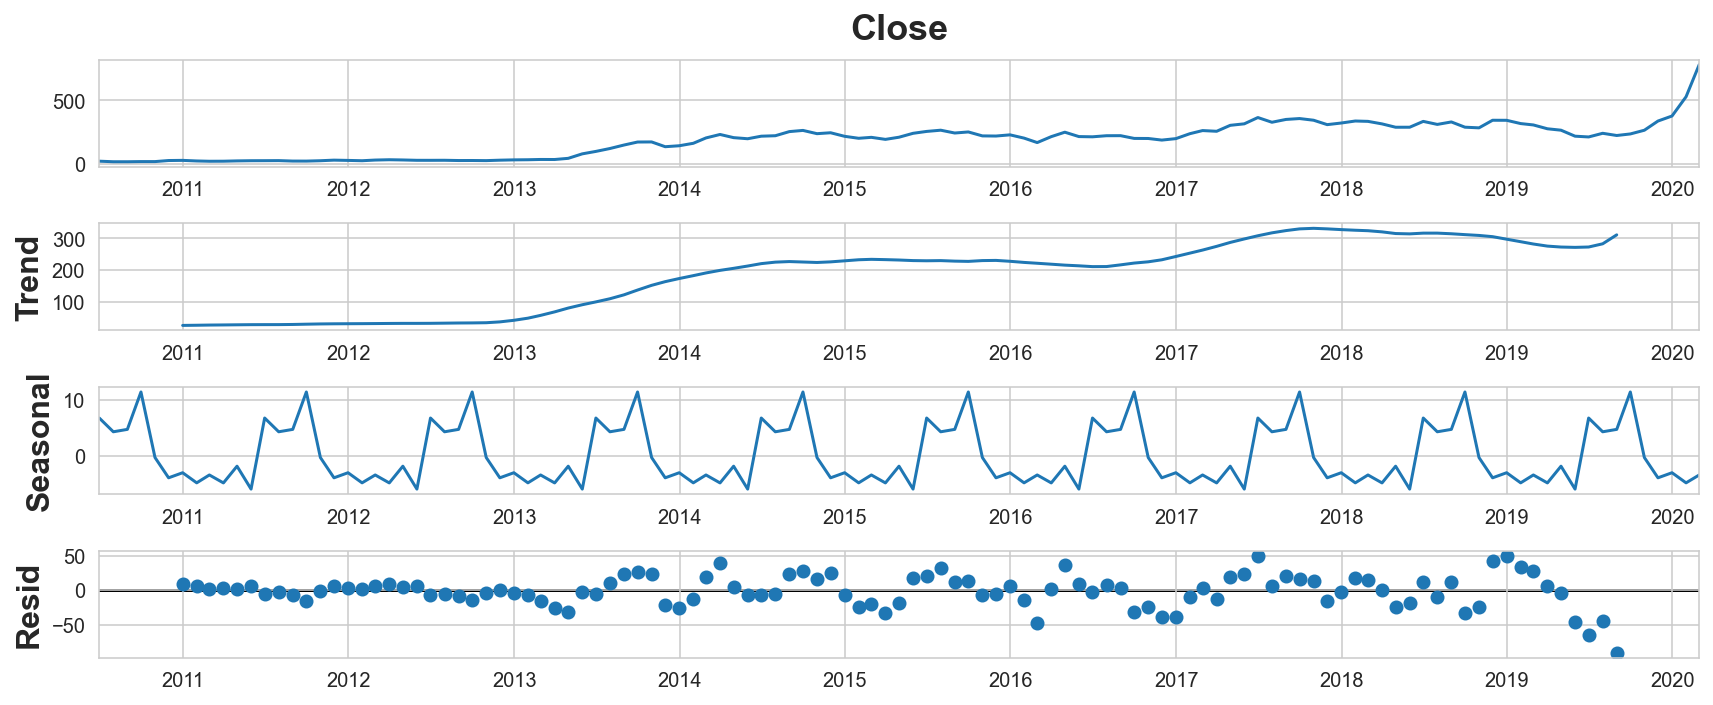

In [27]:
fig = seasonal_decompose(x = tesla_df['Close'])
fig.plot();

### Exercise

SP500 times series analysis. Dataset link https://www.kaggle.com/datasets/camnugent/sandp500